# <div align="center">CM3</div>


###  3.1 Required Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import mean, std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn import preprocessing, metrics,model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### 3.2 Load dataset and assign column names to each feature


In [2]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines = False, warn_bad_lines =True)
df.columns = ['area', 'perimeter','compactness', 'length_kernel', 'width_kernel', 'asymmetry_coeff', 'length_of_kernel_groove', 'target']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     198 non-null    float64
 1   perimeter                198 non-null    float64
 2   compactness              198 non-null    float64
 3   length_kernel            198 non-null    float64
 4   width_kernel             198 non-null    float64
 5   asymmetry_coeff          198 non-null    float64
 6   length_of_kernel_groove  198 non-null    float64
 7   target                   198 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


### 3.3 Extracting features and label from dataset

x variable contains all features values and y variable contains all target values.

In [3]:
x = df.iloc[:, :-1].values

y = df.iloc[:, 7].values

### 3.4 Data Preprocessing 

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

### 3.5 Split dataset into train and test set

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state = None)

### 3.6 Applying 10-fold validation on dataset

In [6]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
kfold.get_n_splits(x_train)

10

### 3.7 Decision Tree with multiple depth

In [7]:
acc1 = []
depth = [3, 5, 10, None]
for k in depth:
    model = DecisionTreeClassifier(max_depth = k)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    if ( k != None):
        print(f'Depth :  {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
      
    else:
        print(f'Depth : {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
    acc1 = np.append(acc1, mean(scores))

Depth :  3 ===> Accuracy = 0.9345588235294118 and Standard Devaition = 0.07237699863075181
Depth :  5 ===> Accuracy = 0.9463235294117647 and Standard Devaition = 0.05638799873540543
Depth :  10 ===> Accuracy = 0.9463235294117647 and Standard Devaition = 0.06222256764129421
Depth : None ===> Accuracy = 0.9463235294117647 and Standard Devaition = 0.05638799873540543


### 3.7.1 Conclusion of DecisionTreeClassifier:

- Inorder to achieve highest accuracy for this model, depth should be 5.
- At depth = 5, 10 and None model able to achieve accuracy = 0.94632.

### 3.8 Random Forest with multiple depth and number of trees

In [8]:
depth = [3, 5, 10, None]
ntree = [5, 10, 50, 150, 200]

acc2=[]

for i in ntree:
    for k in depth:
            model = RandomForestClassifier(max_depth = k, n_estimators = i)
            scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
 
            if ( k != None):
                    print(f'Number of trees : {i} and Depth : {k}  ===> Accuracy =  {mean(scores)} and Standard Deviation = {std(scores)}')
      
            else:
                    print(f'Number of trees : {i} and Depth : {k}  ===> Accuracy =  {mean(scores)} and Standard Deviation = {std(scores)}')
 
            acc2 = np.append(acc2, mean(scores))
            

Number of trees : 5 and Depth : 3  ===> Accuracy =  0.9047794117647058 and Standard Deviation = 0.07068869230452057
Number of trees : 5 and Depth : 5  ===> Accuracy =  0.9047794117647058 and Standard Deviation = 0.0556703117223753
Number of trees : 5 and Depth : 10  ===> Accuracy =  0.8738970588235293 and Standard Deviation = 0.09533407953850126
Number of trees : 5 and Depth : None  ===> Accuracy =  0.9408088235294118 and Standard Deviation = 0.052624923460316345
Number of trees : 10 and Depth : 3  ===> Accuracy =  0.8863970588235294 and Standard Deviation = 0.08296858250802532
Number of trees : 10 and Depth : 5  ===> Accuracy =  0.9102941176470589 and Standard Deviation = 0.08686434956248448
Number of trees : 10 and Depth : 10  ===> Accuracy =  0.9463235294117647 and Standard Deviation = 0.049875493770916546
Number of trees : 10 and Depth : None  ===> Accuracy =  0.9459558823529411 and Standard Deviation = 0.06889925603879161
Number of trees : 50 and Depth : 3  ===> Accuracy =  0.9040

### 3.8.1 Conclusion of RandomForestClassifier:

- Inorder to achieve highest accuracy for this model, depth should be 10 and number of trees should be 50.
- At depth = None and Number of trees = 150, model able to achieve accuracy = 0.9522.

**Note :**
- Model also obtain accuracy at 0.95 number of trees = 200, but for less computation we have selected number of trees = 150.

### 3.9 Gradient Tree Boosting with number of estimators

In [9]:
acc3 = []
n_estimators = [5, 10, 50, 150, 200]
for i in n_estimators:
    model = GradientBoostingClassifier(n_estimators = i)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    print(f'Number of boosting stages =   {i} ==> Accuracy =  {mean(scores)} and Standard Devaition = {std(scores)}')
    acc3 = np.append(acc3, mean(scores))

Number of boosting stages =   5 ==> Accuracy =  0.9404411764705882 and Standard Devaition = 0.06514307516700862
Number of boosting stages =   10 ==> Accuracy =  0.9525735294117647 and Standard Devaition = 0.05137727886660625
Number of boosting stages =   50 ==> Accuracy =  0.9400735294117647 and Standard Devaition = 0.04656362847265871
Number of boosting stages =   150 ==> Accuracy =  0.9400735294117647 and Standard Devaition = 0.05348095940641999
Number of boosting stages =   200 ==> Accuracy =  0.9341911764705882 and Standard Devaition = 0.062053988172372024


### 3.9.1 Conclusion of GradientBoostingClassifier:

- Inorder to achieve highest accuracy for this model, number of boosting stages should be 10.
- At number of boosting stages = 10, model able to achieve accuracy = 0.9525.

### 3.10 Comparing Different models with respect to performance matrix ( Accuracy ):

In [13]:

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(max_depth = 5)))
models.append(('RFC', RandomForestClassifier(max_depth = None, n_estimators = 150)))
models.append(('GBC', GradientBoostingClassifier(n_estimators = 10)))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.922059 (0.066376)
DTC: 0.946324 (0.056388)
RFC: 0.951838 (0.065653)
GBC: 0.940441 (0.065143)


### 3.10.1 Box and whisker  plot for various models :

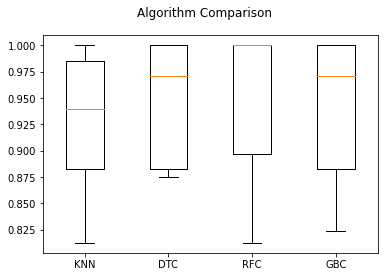

In [15]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.10.2 Conclusion various models :

1. **DecisionTreeClassifier :** 
    1. Minimum and maximum value of accuracy are very near to each other compare to other models.
    2. Median of accuracy at depth = 5 is 0.946.
    3. Interquantile range is also large which means there are more difference in accuracy for this model.
2. **RandomForestClassifier :** 
    1. Minimum and maximum value of accuracy are very far from each other compare to other models which means there is significance difference in min. and max. accuracy.
    2. Median of accuracy at depth = None and number of trees = 150 is 0.9518.
    3. Interquantile range is also small compare to other models, which means there are less difference in accuracy for this model.
3. **GradientBoostingClassifier :** 
    1. Minimum and maximum value of accuracy are very near from each other compare to other models.
    2. Median of accuracy at number of boosting stages = 10 is 0.9404.
    3. Interquantile range is also large which means there are more difference in accuracy for this model.

### 3.10.3 Intereting Patterns :

- There is no significance difference in terms of accuracy in 3 models.
- In terms of computation, GradientBoostingClassifier with high number of boosting stages perform highest computation. However with more number of boosting stages model may not be able to achieve high accuracy.
- RandomForestClassifier has some more number of permutation as it includes depth as well aas number of trees. Moreover there is significance difference model accuracy.
